<a href="https://colab.research.google.com/github/vegorovmsk/ml_beginner_level/blob/master/jun_ml_linear_regression_II_hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Урок 3. Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

# Новый раздел

# Новый раздел

In [65]:
import numpy as np


def degree_generator(data, degree):
    return np.array([
        data ** power for power in range(1, degree + 1)
    ]).T

In [66]:
import pandas as pd


data = pd.read_csv("non_linear.csv")

In [67]:
degree = 8
X = degree_generator(data.x_train, degree)
X.shape

(50, 8)

In [68]:
y = data.y_train

In [69]:
from sklearn.model_selection import train_test_split


x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)
x_valid.shape

(10, 8)

In [70]:
from sklearn.linear_model import Lasso, Ridge

In [71]:
Lasso_model = Lasso(alpha=0.8)
Ridge_model = Ridge(alpha=0.8)

In [72]:
Lasso_model.fit(x_train, y_train)

/home/vladimir/anaconda3/envs/postgres_env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.050129584279022, tolerance: 0.0025683822361998753
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.8)

In [73]:
Ridge_model.fit(x_train, y_train)

Ridge(alpha=0.8)

In [74]:
y_Lasso_pred = Lasso_model.predict(x_valid)

In [75]:
y_Ridge_pred = Ridge_model.predict(x_valid)

In [76]:
Lasso_model.coef_

array([-0.00000000e+00, -0.00000000e+00, -1.42925411e-02, -7.92822130e-03,
        8.59972358e-04,  1.54682399e-04,  3.68016000e-06, -1.32170954e-06])

In [77]:
from matplotlib import pyplot as plt

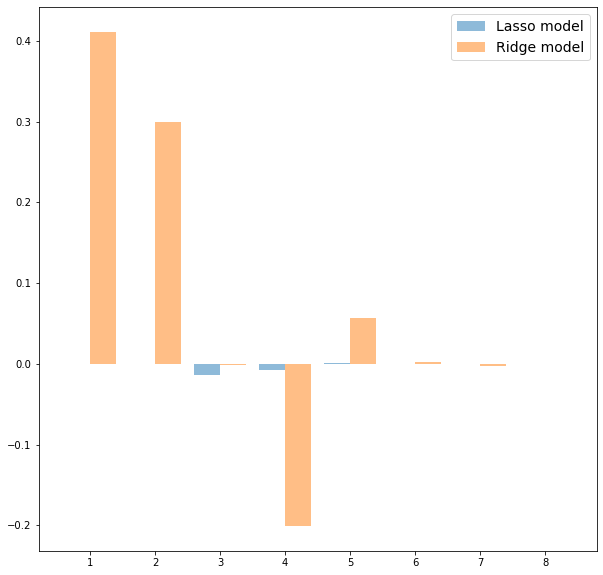

In [109]:
plt.figure(figsize=(10, 10))
plt.bar(np.arange(1, 9), Lasso_model.coef_, width=0.4, alpha=0.5, label='Lasso model')
plt.bar(np.arange(1, 9) + 0.4, Ridge_model.coef_, width=0.4, alpha=0.5, label='Ridge model')
plt.xticks(np.arange(1, 9) + 0.2, np.arange(1, 9))
plt.legend(fontsize=14)
plt.show()

Большие значения коэффициентов модели Ridge регрессии говорит о её переобучении.